In [141]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [142]:
df=pd.read_csv("/content/marketing_campaign.csv")

In [143]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [144]:
df.shape

(2240, 29)

In [145]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [146]:
#Trying to find a trend in the missing values for income
df[df["Income"].isna()].head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,5/11/2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,1/1/2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


In [147]:
#we grouped the data based on eduction levels and found the mean income using that
#we also grouped the data based on a range of purchases they have made and the using 
#correlation between the two we have filled the missing values in income using their means

In [148]:

# Group the data by Education and calculate the mean income
mean_income_by_education = df.groupby('Education')['Income'].mean()

# Iterate over the rows with missing Income values
for index, row in df.iterrows():
    if pd.isnull(row['Income']):
        education = row['Education']
        similar_group = df[(df['Education'] == education) &
                           (df['NumDealsPurchases'] == row['NumDealsPurchases']) &
                           (df['NumWebPurchases'] == row['NumWebPurchases']) &
                           (df['NumCatalogPurchases'] == row['NumCatalogPurchases']) &
                           (df['NumStorePurchases'] == row['NumStorePurchases'])]
        if len(similar_group) > 0:
            mean_income = similar_group['Income'].mean()
            df.loc[index, 'Income'] = mean_income

In [149]:
#rechecking the data for Income
df.isna().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 11
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [150]:
#the remaining null values dont have correspondence with any education group so we are dropping 11 columns 
df=df.dropna()

In [151]:
df.shape

(2229, 29)

In [152]:
#rechecking the data for Income
df.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

**Checking for inconsistencies**

In [153]:
pd.unique(df['Education']) 

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [154]:
pd.unique(df['Marital_Status']) 

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [155]:
# Count the rows where 'Marital_Status' is equal to 'Absurd'
# Print the count
print("Count of rows with 'Marital_Status' as 'Absurd':", len(df[df['Marital_Status'] == 'Absurd']))
print("Count of rows with 'Marital_Status' as 'YOLO':", len(df[df['Marital_Status'] == 'YOLO']))

Count of rows with 'Marital_Status' as 'Absurd': 2
Count of rows with 'Marital_Status' as 'YOLO': 2


In [156]:
#dropping data with marital status as Absurd or YOLO
values_to_drop = ['Absurd', 'YOLO']
df = df[~df['Marital_Status'].isin(values_to_drop)]

In [157]:
df.shape

(2225, 29)

In [158]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

In [159]:
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')

In [160]:
pd.unique(df['Marital_Status']) 

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [161]:
pd.unique(df['Year_Birth']) 

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978,
       1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953,
       1961, 1956, 1992, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [162]:
pd.unique(df['Kidhome']) 

array([0, 1, 2])

In [163]:
pd.unique(df['Teenhome']) 

array([0, 1, 2])

In [164]:
pd.unique(df['Dt_Customer']) 

array(['4/9/2012', '8/3/2014', '21-08-2013', '10/2/2014', '19-01-2014',
       '9/9/2013', '13-11-2012', '8/5/2013', '6/6/2013', '13-03-2014',
       '15-11-2013', '10/10/2012', '24-11-2012', '24-12-2012',
       '31-08-2012', '28-03-2013', '3/11/2012', '8/8/2012', '6/1/2013',
       '23-12-2012', '11/1/2014', '18-03-2013', '2/1/2013', '27-05-2013',
       '31-05-2013', '22-11-2013', '22-05-2014', '11/5/2013',
       '29-10-2012', '20-02-2013', '29-08-2013', '31-12-2013', '2/9/2013',
       '11/2/2014', '1/2/2013', '29-04-2013', '12/3/2013', '2/10/2013',
       '28-06-2014', '9/11/2012', '24-05-2013', '1/1/2014', '8/11/2012',
       '12/5/2014', '11/8/2012', '7/6/2014', '12/6/2013', '19-11-2012',
       '2/4/2013', '28-04-2014', '17-06-2013', '3/3/2014', '4/7/2013',
       '7/9/2012', '18-02-2013', '11/6/2013', '6/12/2013', '21-05-2013',
       '11/5/2014', '19-03-2014', '27-09-2013', '8/4/2013', '11/9/2012',
       '14-09-2012', '17-03-2013', '5/4/2013', '30-04-2014', '19-12-2012',
  

In [165]:
#catering incostency in dates
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Convert the 'Dt_Customer' column to the desired format
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%Y-%m-%d')

# Print the unique values in the 'Dt_Customer' column
pd.unique(df['Dt_Customer'])

<ipython-input-165-aae467593f30>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


array(['2012-04-09', '2014-08-03', '2013-08-21', '2014-10-02',
       '2014-01-19', '2013-09-09', '2012-11-13', '2013-08-05',
       '2013-06-06', '2014-03-13', '2013-11-15', '2012-10-10',
       '2012-11-24', '2012-12-24', '2012-08-31', '2013-03-28',
       '2012-03-11', '2012-08-08', '2013-06-01', '2012-12-23',
       '2014-11-01', '2013-03-18', '2013-02-01', '2013-05-27',
       '2013-05-31', '2013-11-22', '2014-05-22', '2013-11-05',
       '2012-10-29', '2013-02-20', '2013-08-29', '2013-12-31',
       '2013-02-09', '2014-11-02', '2013-01-02', '2013-04-29',
       '2013-12-03', '2013-02-10', '2014-06-28', '2012-09-11',
       '2013-05-24', '2014-01-01', '2012-08-11', '2014-12-05',
       '2012-11-08', '2014-07-06', '2013-12-06', '2012-11-19',
       '2013-02-04', '2014-04-28', '2013-06-17', '2014-03-03',
       '2013-04-07', '2012-07-09', '2013-02-18', '2013-11-06',
       '2013-06-12', '2013-05-21', '2014-11-05', '2014-03-19',
       '2013-09-27', '2013-08-04', '2012-11-09', '2012-

In [166]:
pd.unique(df['Recency']) 

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25, 40,
        9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74,
       85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81,
       80, 14, 52, 93, 50, 60, 66, 97, 62,  6, 33, 22, 71, 67,  7])

In [167]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [168]:
#the rest are all numeric values and dont have dirty data

<ipython-input-170-d620ff8b7647>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


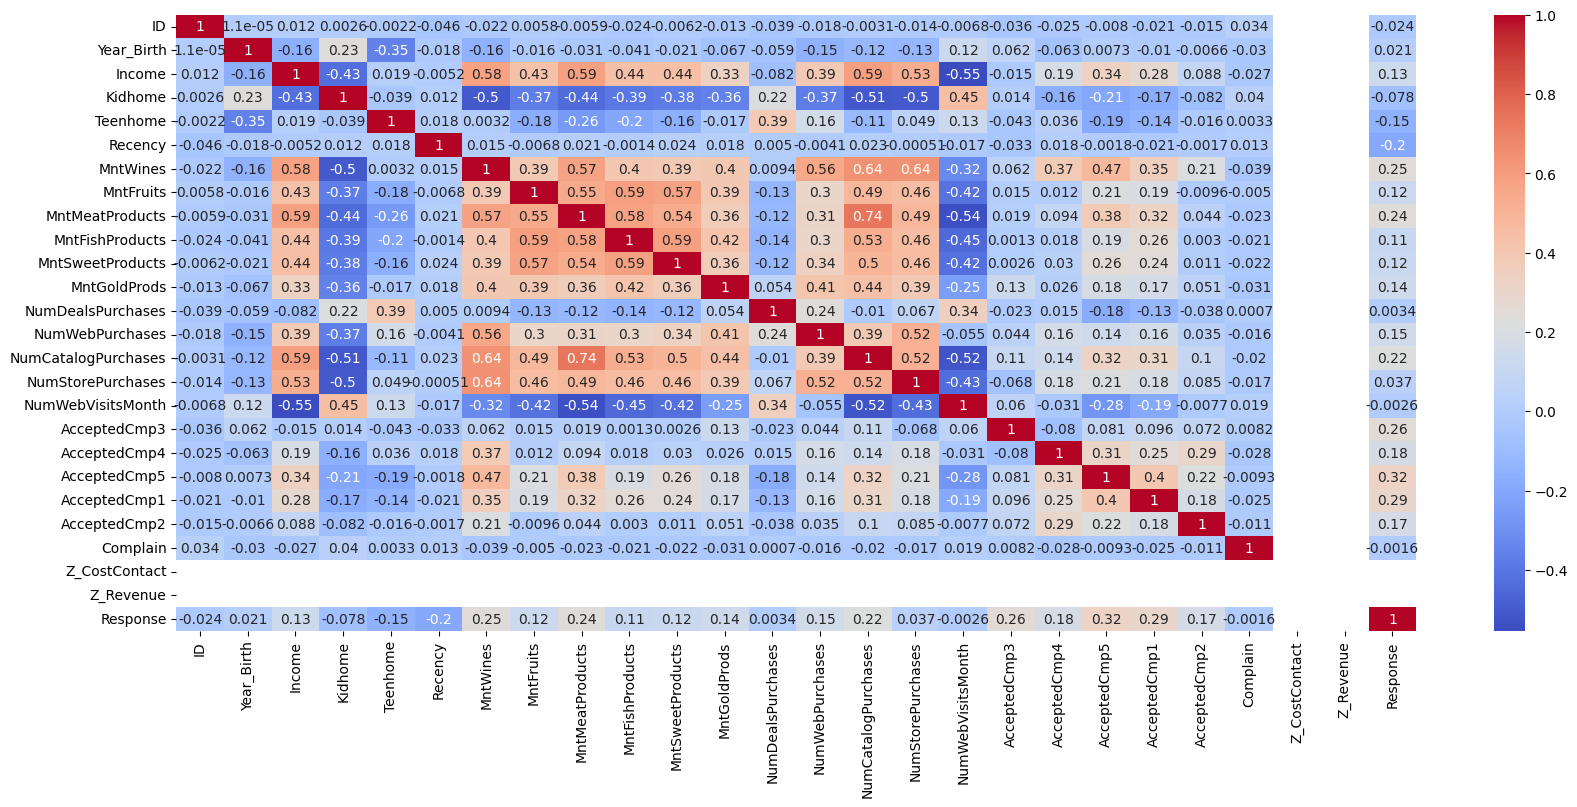

In [170]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(20, 8))

# Create the correlation heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the heatmap
plt.show()

In [171]:
# Descriptive Statistics
print(df.describe())


                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2225.000000  2225.000000    2225.000000  2225.000000  2225.000000   
mean    5586.180225  1968.812135   52148.376935     0.444944     0.505618   
std     3246.378945    11.981053   25162.156287     0.537909     0.544007   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2815.000000  1959.000000   34984.000000     0.000000     0.000000   
50%     5454.000000  1970.000000   51287.000000     0.000000     0.000000   
75%     8420.000000  1977.000000   68462.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2225.000000  2225.000000  2225.000000      2225.000000   
mean     49.095730   304.019775    26.243146       166.309663   
std      28.950455   337.360310    39.776565       224.036456   
min       0.000000     0.000000     0.000000  

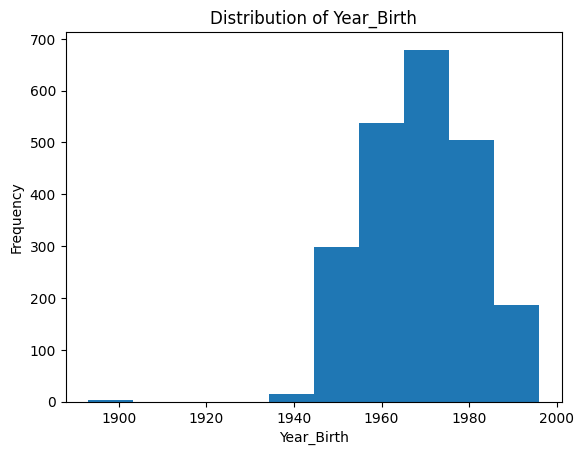

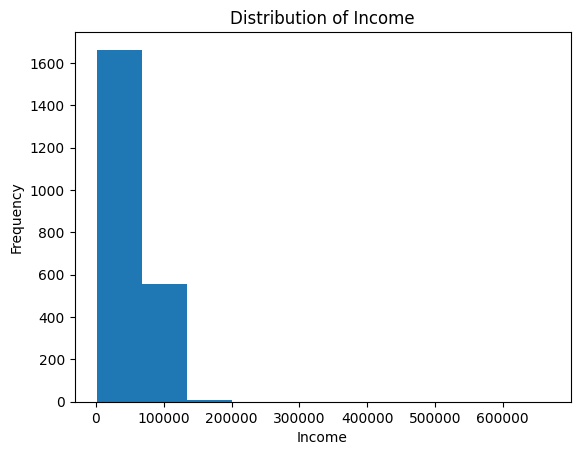

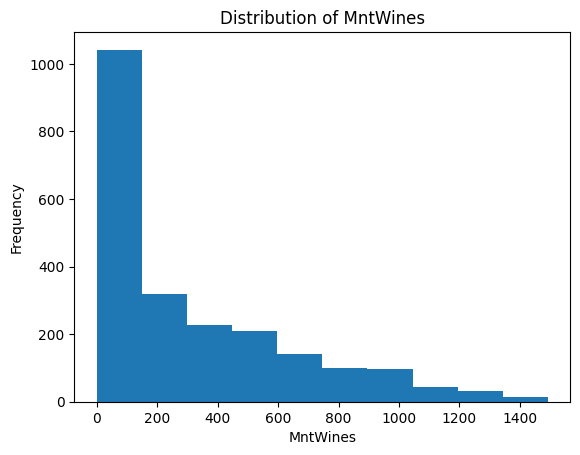

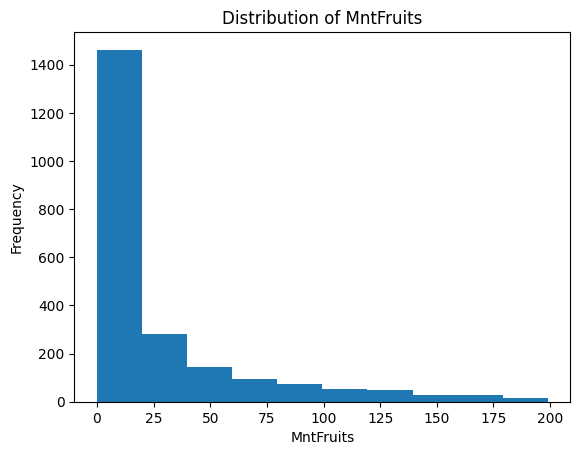

In [173]:
#making histograms for imp columns

# List of columns for which histograms need to be created
columns = ['Year_Birth', 'Income', 'MntWines', 'MntFruits']

# Loop over columns and create histograms
for column in columns:
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + column)
    plt.show()



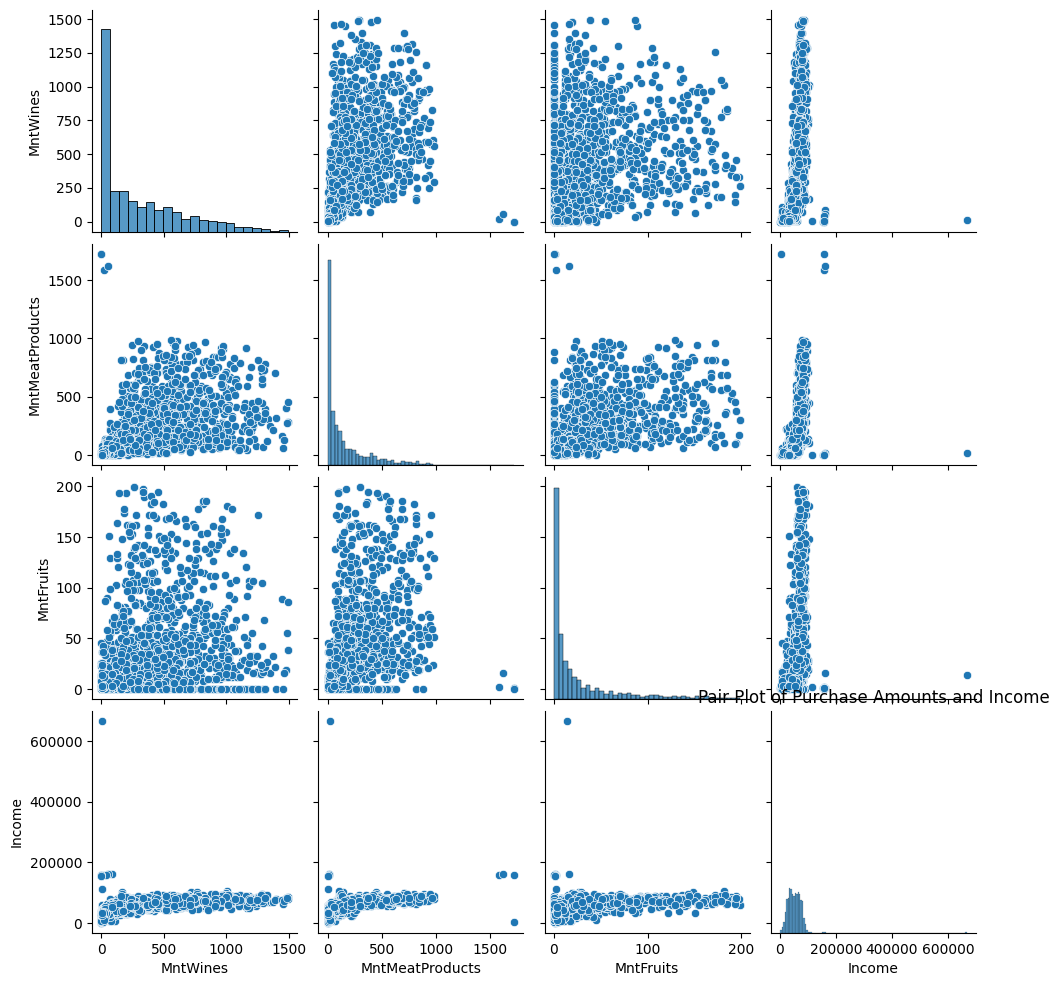

In [174]:
sns.pairplot(df[['MntWines', 'MntMeatProducts', 'MntFruits', 'Income']])
plt.title('Pair Plot of Purchase Amounts and Income')
plt.show()

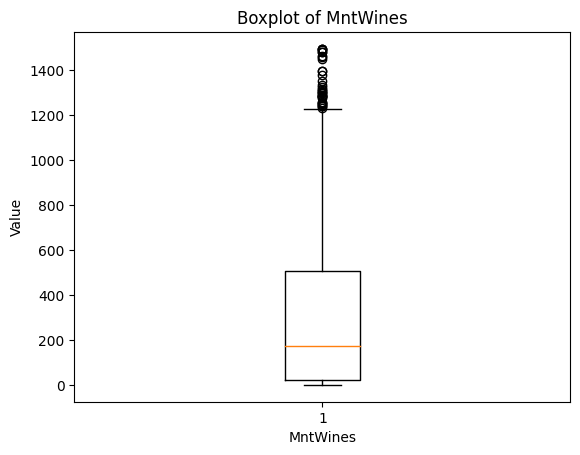

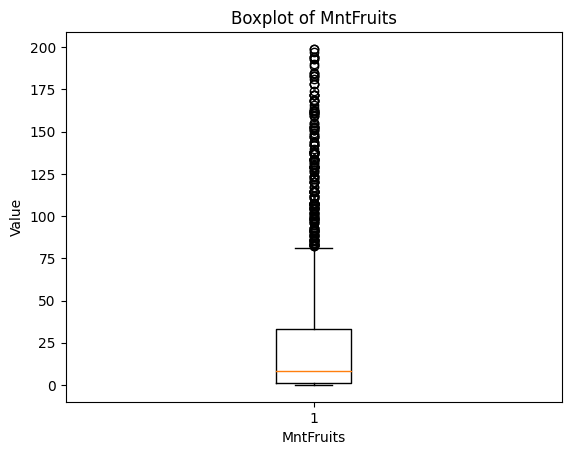

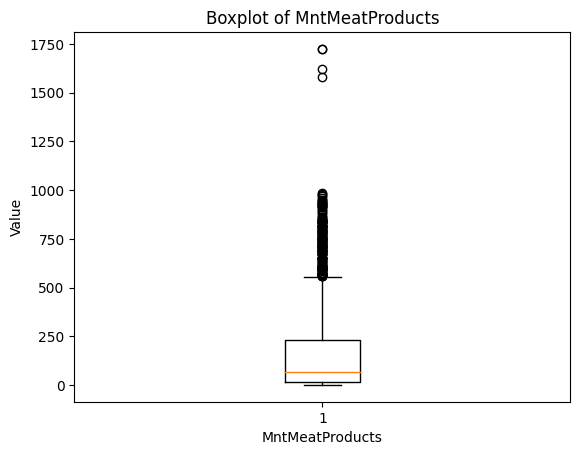

In [175]:
# List of columns for which boxplots need to be created
columns = ['MntWines', 'MntFruits', 'MntMeatProducts']

# Loop over columns and create boxplots
for column in columns:
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Boxplot of ' + column)
    plt.show()

In [176]:

# Define the column(s) to analyze for outliers
columns = ['Income', 'MntWines', 'MntFruits']

# Set the threshold for outlier detection (in terms of IQR)
threshold = 1.5

# Perform outlier analysis for each column
for column in columns:
    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print the results
    print("Outliers in", column)
    print(outliers)
    print()


Outliers in Income
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD        Married  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master        Married  157733.0        1   
1653   4931        1977  Graduation        Married  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation        Married  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
164          1  2014-01-03       98        20  ...                  0   
617          1  2013-03-06       31        85  ...                  1   
655          0  2014-07-02       81         1  ...                  0   
687          0  2012-04-08     

In [178]:
#we have identified that there are outliers in income, revenue and recency 
#because Some individuals or households may have exceptionally high incomes 
#due to factors such as high-paying jobs, business success, investments, or inheritances.
#Outliers in recency can occur due to recent significant events, such as customer activity 
#spikes, promotional campaigns, or major changes in customer behavior.

In [116]:
df.to_csv('cleaned_data.csv', index=False)
